<a href="https://colab.research.google.com/github/Sankarsh-Sunku/Implementation-Of-DL-in-Pytorch/blob/main/Weights/Identical_Random_Weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import copy

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# create a model
net = nn.Sequential(
    nn.Linear(2,8),  # input layer
    nn.Linear(8,1),  # hidden layer
    nn.Linear(1,1),  # output unit
   )

In [7]:
### NO RANDOM SEED

# create a "template" network
net_noseed = copy.deepcopy( net )

# update the weights
for p in net_noseed.named_parameters():
  print(p, end = " qwe\n")
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

('0.weight', Parameter containing:
tensor([[ 0.0920,  0.4871],
        [ 0.6543,  0.0379],
        [-0.1111, -0.0407],
        [ 0.6953,  0.6108],
        [ 0.5144,  0.3257],
        [-0.3062,  0.3958],
        [-0.5845,  0.2199],
        [ 0.4278, -0.2427]], requires_grad=True)) qwe
('0.bias', Parameter containing:
tensor([ 0.2377, -0.3983, -0.6270,  0.2005,  0.2785, -0.2237, -0.0094,  0.2223],
       requires_grad=True)) qwe
('1.weight', Parameter containing:
tensor([[ 0.1111,  0.0060, -0.1063,  0.2973,  0.3113, -0.3300,  0.1543,  0.0643]],
       requires_grad=True)) qwe
('1.bias', Parameter containing:
tensor([0.2133], requires_grad=True)) qwe
('2.weight', Parameter containing:
tensor([[-0.1623]], requires_grad=True)) qwe
('2.bias', Parameter containing:
tensor([-0.5321], requires_grad=True)) qwe


🧠 Why do we use a seed?
A random seed is used to ensure reproducibility of experiments.

When you initialize weights using something like nn.init.xavier_normal_(), it uses random numbers under the hood.

If you don’t set a seed, you’ll get different initial weights every time you run your code.

But if you set the same seed, you’ll get the same random numbers → same initial weights → reproducible training behavior.


In [9]:
### RANDOM SEED 1a

# create a "template" network
net_rs1a = copy.deepcopy( net )

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1a.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [10]:
### RANDOM SEED 2

# create a "template" network
net_rs2 = copy.deepcopy( net )

# set the seed to 2
torch.manual_seed(2)

# update the weights
for p in net_rs2.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [13]:
### RANDOM SEED 1b

# create a "template" network
net_rs1b = copy.deepcopy( net )

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1b.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [14]:
# initialize empty arrays
w_ns = np.array([])
w_1a = np.array([])
w_2  = np.array([])
w_1b = np.array([])

# loop over layers in the models
for i in range(3):

  # extract the vectorized weights matrices
  w_ns = np.append(w_ns,net_noseed[i].weight.view(-1).detach().numpy())
  w_1a = np.append(w_1a,  net_rs1a[i].weight.view(-1).detach().numpy())
  w_2  = np.append(w_2 ,   net_rs2[i].weight.view(-1).detach().numpy())
  w_1b = np.append(w_1b,  net_rs1b[i].weight.view(-1).detach().numpy())

# check the vector
w_ns

array([ 1.4260515 ,  0.03995468, -0.05489437,  1.07158506, -0.8496241 ,
        0.48266321,  0.63996112,  0.0987211 ,  0.11200905,  0.1765998 ,
        0.40511841, -0.54304504,  0.23113762,  0.42492166, -1.00359619,
       -0.25291643,  0.62639594, -0.1078525 , -0.0623262 ,  0.12705801,
       -0.52648157,  0.29221714, -0.47387615, -0.47136602, -0.15188861])

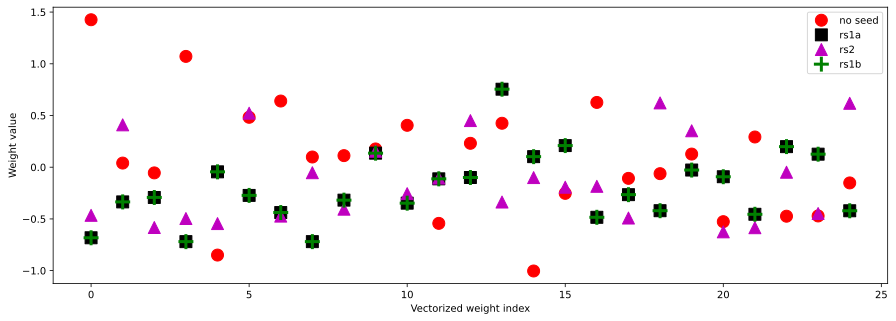

In [15]:
# plotting

fig = plt.figure(figsize=(15,5))

plt.plot(w_ns,'ro',markersize=12,label='no seed')
plt.plot(w_1a,'ks',markersize=12,label='rs1a')
plt.plot(w_2 ,'m^',markersize=12,label='rs2')
plt.plot(w_1b,'g+',markersize=15,label='rs1b',markeredgewidth=3)
plt.legend()
plt.xlabel('Vectorized weight index')
plt.ylabel('Weight value')

plt.show()

In [16]:
# the algebraic test

print('1a-1b should be zeros:')
print( w_1a-w_1b )
print('\n\n')

print('1a-2 should be non-zeros:')
print( w_1a-w_2 )
print('\n\n')

print('1a-ns should be non-zeros:')
print( w_1a-w_ns )
print('\n\n')

1a-1b should be zeros:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]



1a-2 should be non-zeros:
[-0.21680683 -0.74543169  0.29078251 -0.22352022  0.50025801 -0.79460078
  0.03471264 -0.66646316  0.08751756 -0.01855947 -0.09211725 -0.0073103
 -0.55001713  1.09119886  0.20277754  0.40263602 -0.29967313  0.22609788
 -1.04223195 -0.37989978  0.53314489  0.12994796  0.2475912   0.57373706
 -1.03930008]



1a-ns should be non-zeros:
[-2.10831875 -0.37546854 -0.23757477 -1.79136854  0.80482797 -0.75510079
 -1.07812861 -0.81833084 -0.43048981 -0.0407712  -0.75274393  0.43059084
 -0.33054     0.32957837  1.10575103  0.46204938 -1.11081526 -0.15757312
 -0.35830357 -0.15451741  0.43431747 -0.74742228  0.67300464  0.59738046
 -0.26930654]



